In [70]:
#importting important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)


### problem statement:
##### A retail company wants to understand the customer purchase behaviour - specifically the purchase amount, against various products of different categories. They want to build a model to predict the purchase amount of customers against various products which will help them to create personalised offers for customers

In [71]:
df_train = pd.read_csv('data/train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [73]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [74]:
df_test= pd.read_csv('data/test.csv')

In [75]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [76]:
df= pd.concat([df_train, df_test], ignore_index=True)

In [77]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [78]:
df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [79]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [80]:
#we do not need user ID, so we drop it
df.drop(['User_ID'], axis =1, inplace = True)

In [81]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [82]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [83]:
df.shape

(783667, 11)

# Working on Gender Categorical columns

In [84]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [85]:
df['Gender']= df['Gender'].map({'M':0,'F':1})

In [86]:
df[['Gender']]

,Gender
0,1
1,1
2,1
3,1
4,0
...,...
783662,1
783663,1
783664,1
783665,1


# Handling Categorical feature age as well


In [87]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

- based on some domain knowledge - it is acceptable to say that people from 0-17 are less likely to shop during black friday sale, so are people from 51-55 and so on. you can just apply a map function.

giving dummy values here will not be such a god

In [88]:
#df['Age']= df['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4, '46-50':5,'51-55':6,'55+':7 })

In [89]:
df[['Age']]

,Age
0,0-17
1,0-17
2,0-17
3,0-17
4,55+
...,...
783662,26-35
783663,26-35
783664,26-35
783665,46-50


## Another way doing Label Encoding for Age category


In [90]:
##Importing label encoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
#encode labels in each column feature
df['Age']= label_encoder.fit_transform(df['Age'])

In [91]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 65.8+ MB


In [93]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [94]:
#let's work on city categories
df_city= pd.get_dummies(df['City_Category'], drop_first= True)

In [95]:
df= pd.concat([df,df_city], axis =1)

In [ ]:
#now deoping the previous city category
df.drop(['City_Category'],axis= 1, inplace = True)

In [97]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,0,6,16,4+,0,8,NaN,NaN,7969.0,False,True


# Handling null values

In [98]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [99]:
#### doing data exploration before i handle product category 2 and 3 

In [100]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

- this is a discrete feature(categorical)
- the best way to deal with null values in discrete features are -> replace the missing value with mode

In [101]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [102]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [106]:
df['Product_Category_3'].mode()[0]

np.float64(16.0)

In [107]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
783662    16.0
783663    16.0
783664    12.0
783665    16.0
783666    16.0
Name: Product_Category_3, Length: 783667, dtype: float64

In [109]:
# - stay in current city years
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: count, dtype: int64

In [110]:
## since 0-3 is already in order, we can give 4+ years the rank of 4.
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [111]:
### convert object into integer stay in current years 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 61.3+ MB


In [113]:
## notice that B and C have the datatype uint8. we can change it to int
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

## best visualisation: seaborn: sns.pairplot

In [118]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Purchase'>

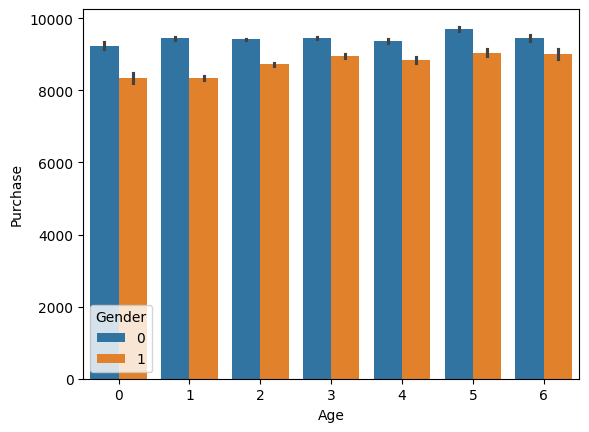

In [120]:
sns.barplot(data = df, x= 'Age', y= 'Purchase',hue= 'Gender')

<Axes: xlabel='Occupation', ylabel='Purchase'>

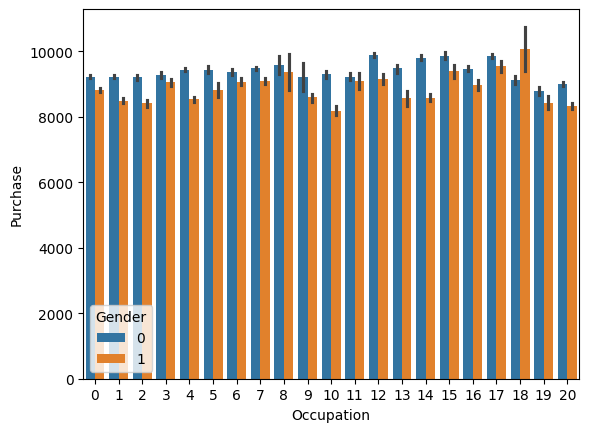

In [122]:
sns.barplot(data = df, x= 'Occupation', y= 'Purchase',hue= 'Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

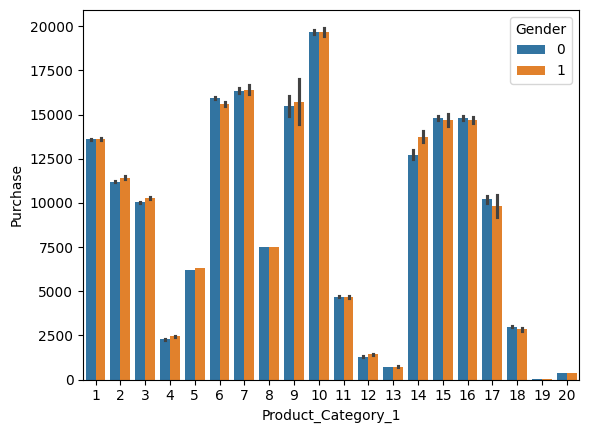

In [124]:
## product category 1
sns.barplot(x= 'Product_Category_1',y= 'Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

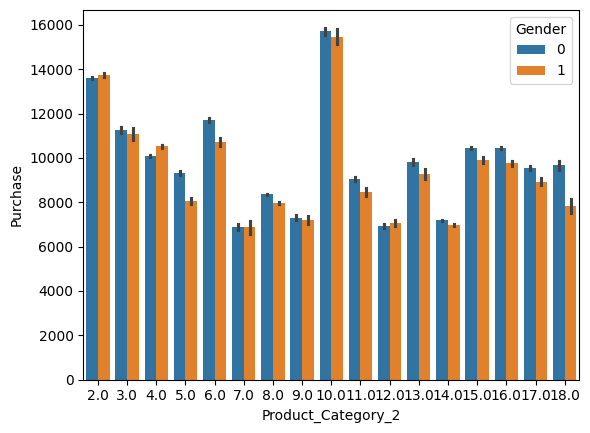

In [125]:
## product category 2
sns.barplot(x= 'Product_Category_2',y= 'Purchase',hue='Gender',data=df)

#### product category 1 has purchased more than product category 2. 
- men are purchasing more here as well

In [123]:
df_test = df[df['Purchase'].isnull()]

In [126]:
df_train = df[df['Purchase'].isnull()==False]

### now that we've preprocessed the data, and seperated the train and test data - feature scaling is to be done now 

In [127]:
X = df_train.drop(['Purchase'],axis=1)

In [128]:
y = df_train[['Purchase']]

In [129]:
print(X.shape)
print(y.shape)

(550068, 11)
(550068, 1)


## Feature Engineering


In [130]:
## train test split for training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [131]:
X_train.drop(['Product_ID'],axis=1,inplace=True)
X_test.drop(['Product_ID'],axis=1,inplace=True)

## Feature Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)